In [106]:
import pandas as pd
import numpy as np
import sys

np.set_printoptions(threshold = sys.maxsize)

temp = pd.read_csv('g5_labeled_sarcasm.csv')
temp = temp.rename(columns={'Text': 'Tweet', 'Created At': 'Date', 'Is Retweet': 'Retweet', 'label (0:misinformation, 1: counter-misinformation, 2: irrelevant)': 'Misinformation Label', 'Is_Sarcasm (1: Not_Sarcasm, 2: Sarcasm)': 'Sarcasm Label'})
temp = temp.set_index(pd.to_datetime(temp['Date'])).drop(['Date'], axis=1).replace({'Sarcasm Label': {1: 0, 2: 1}}).replace(r'@\w+','@USER', regex=True).sort_index()
temp['User Location'] = temp['User Location'].str.replace(r'[^a-zA-Z]', '').apply(lambda s: ''.join(filter(lambda c: ord(c) < 256, str(s))))
temp

C:\Users\Eric\AppData\Local\Temp\ipykernel_19656\1372645508.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = temp.set_index(pd.to_datetime(temp['Date'])).drop(['Date'], axis=1).replace({'Sarcasm Label': {1: 0, 2: 1}}).replace(r'@\w+','@USER', regex=True).sort_index()


,Tweet,Retweet,Language,User Location,Misinformation Label,Sarcasm Label
Date,,,,,,
2020-01-21 07:25:24+00:00,@USER @USER Coronavirus is the government prep...,False,en,Space,0,0
2020-01-21 18:41:18+00:00,@USER THE stock to buy is $AAPL with the coron...,False,en,nan,2,0
2020-01-22 00:48:28+00:00,5g #WuhanPneumonia #WuhanOutbreak @USER @USER ...,False,en,nan,2,0
2020-01-22 05:01:27+00:00,Now this makes you think...🤔🤔🤔 . #pardonmyamer...,False,en,"Portland, OR",2,1
2020-01-22 14:50:46+00:00,They are moving fast now - Coronavirus is clea...,False,en,United Kingdom,0,1
...,...,...,...,...,...,...
2020-05-21 19:59:10+00:00,5G causes Corona Virus. change my mind @USER,False,en,Buffalo New York,0,0
2020-05-21 20:03:43+00:00,Covid 19 will protect us from 5g,False,en,,0,1
2020-05-21 20:07:16+00:00,Covid-19 5G is why I have no gf,False,en,nan,2,1


In [282]:
mpl.rcParams['figure.dpi'] = 100

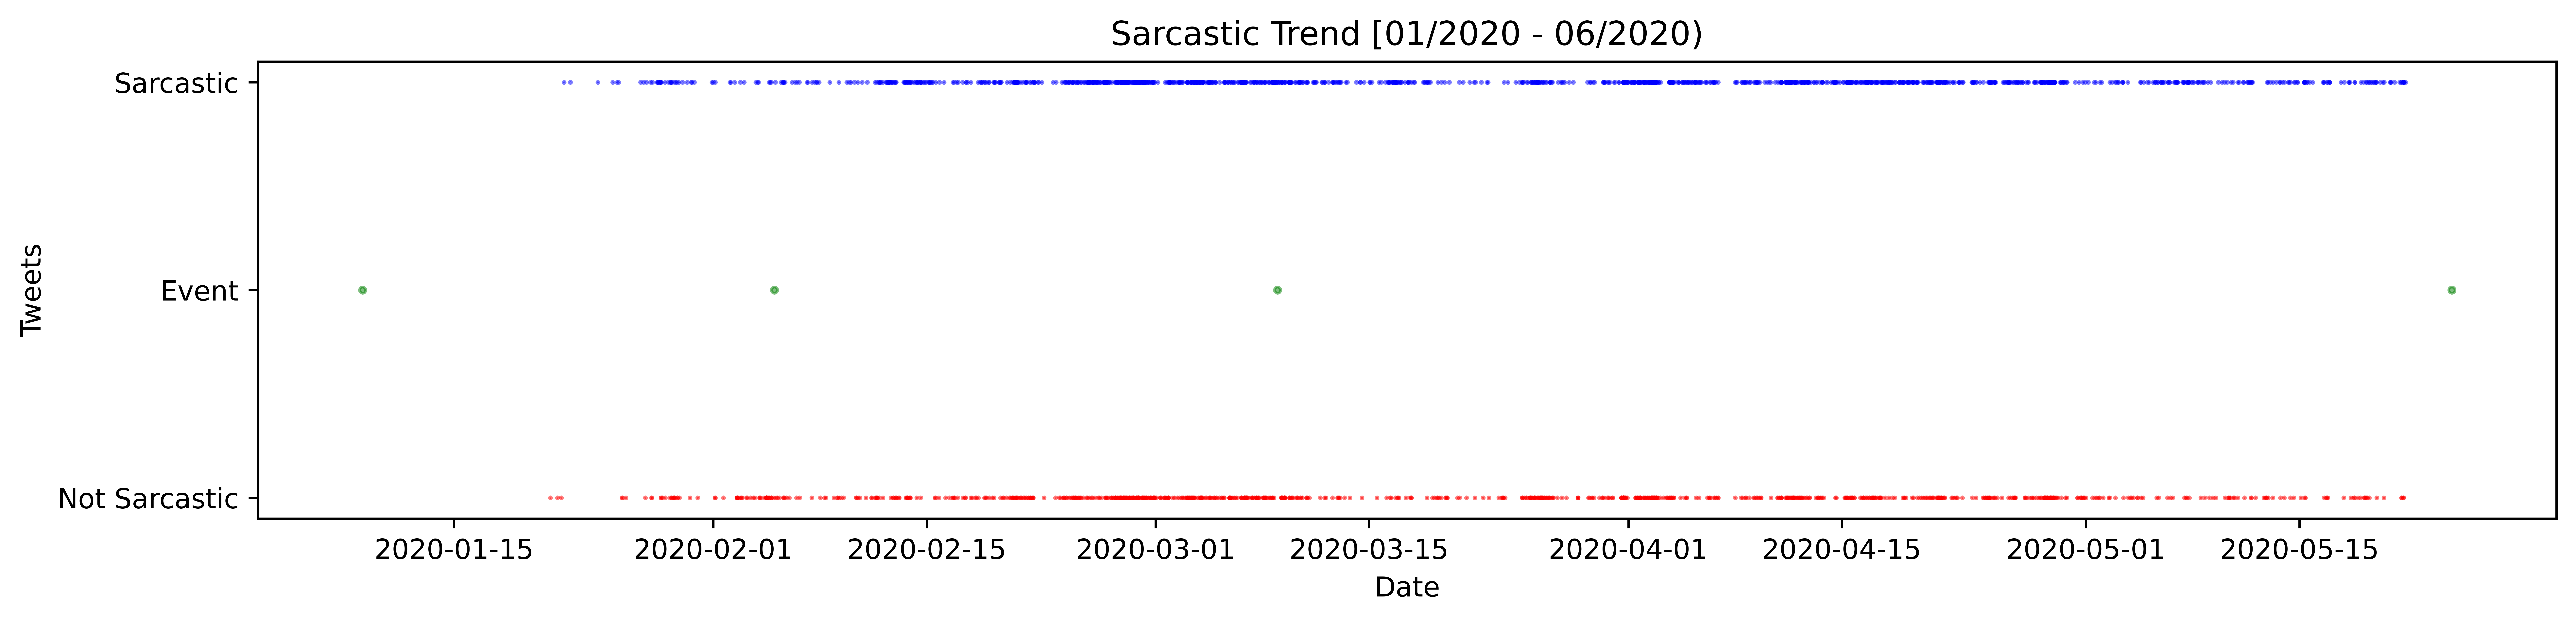

In [204]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

s1 = temp.loc[temp['Sarcasm Label'] == 1].replace({'Sarcasm Label': {1: 'Sarcastic'}})
s0 = temp.loc[temp['Sarcasm Label'] == 0].replace({'Sarcasm Label': {0: 'Not Sarcastic'}})

e = ['COVID Announced', 'Trump Impeached', 'DOW Jones drops 780bps', 'George Floyd Death']
d = ['2020-01-09', '2020-02-05', '2020-03-09', '2020-05-25']
ev = ['Event','Event','Event','Event']

event = {'Events': ['Event', 'Event', 'Event', 'Event'], 'Date': ['2020-01-09', '2020-02-05', '2020-03-09', '2020-05-25']}

events = pd.DataFrame(data=event)
events['Date'] = pd.to_datetime(event['Date'])
# events = events.set_index(pd.to_datetime(event['Date']))
# events = events.drop(['Date'], axis=1)

fig = plt.figure(figsize=(15,3), dpi=1000)
ax1 = fig.add_subplot(111)
ax1.scatter(x=s1.index, y=s1['Sarcasm Label'], c='b', alpha=0.5, label='Sarcastic Tweets', s=0.5)
ax1.scatter(x=events['Date'], y=events['Events'], c='g', alpha=0.5, label='Events', s=5)
ax1.scatter(x=s0.index, y=s0['Sarcasm Label'], c='r', alpha=0.5, label='Non-Sarcastic Tweets', s=0.5)
plt.gca().invert_yaxis()
plt.title('Sarcastic Trend [01/2020 - 06/2020)')
plt.ylabel('Tweets')
plt.xlabel('Date')
plt.show()

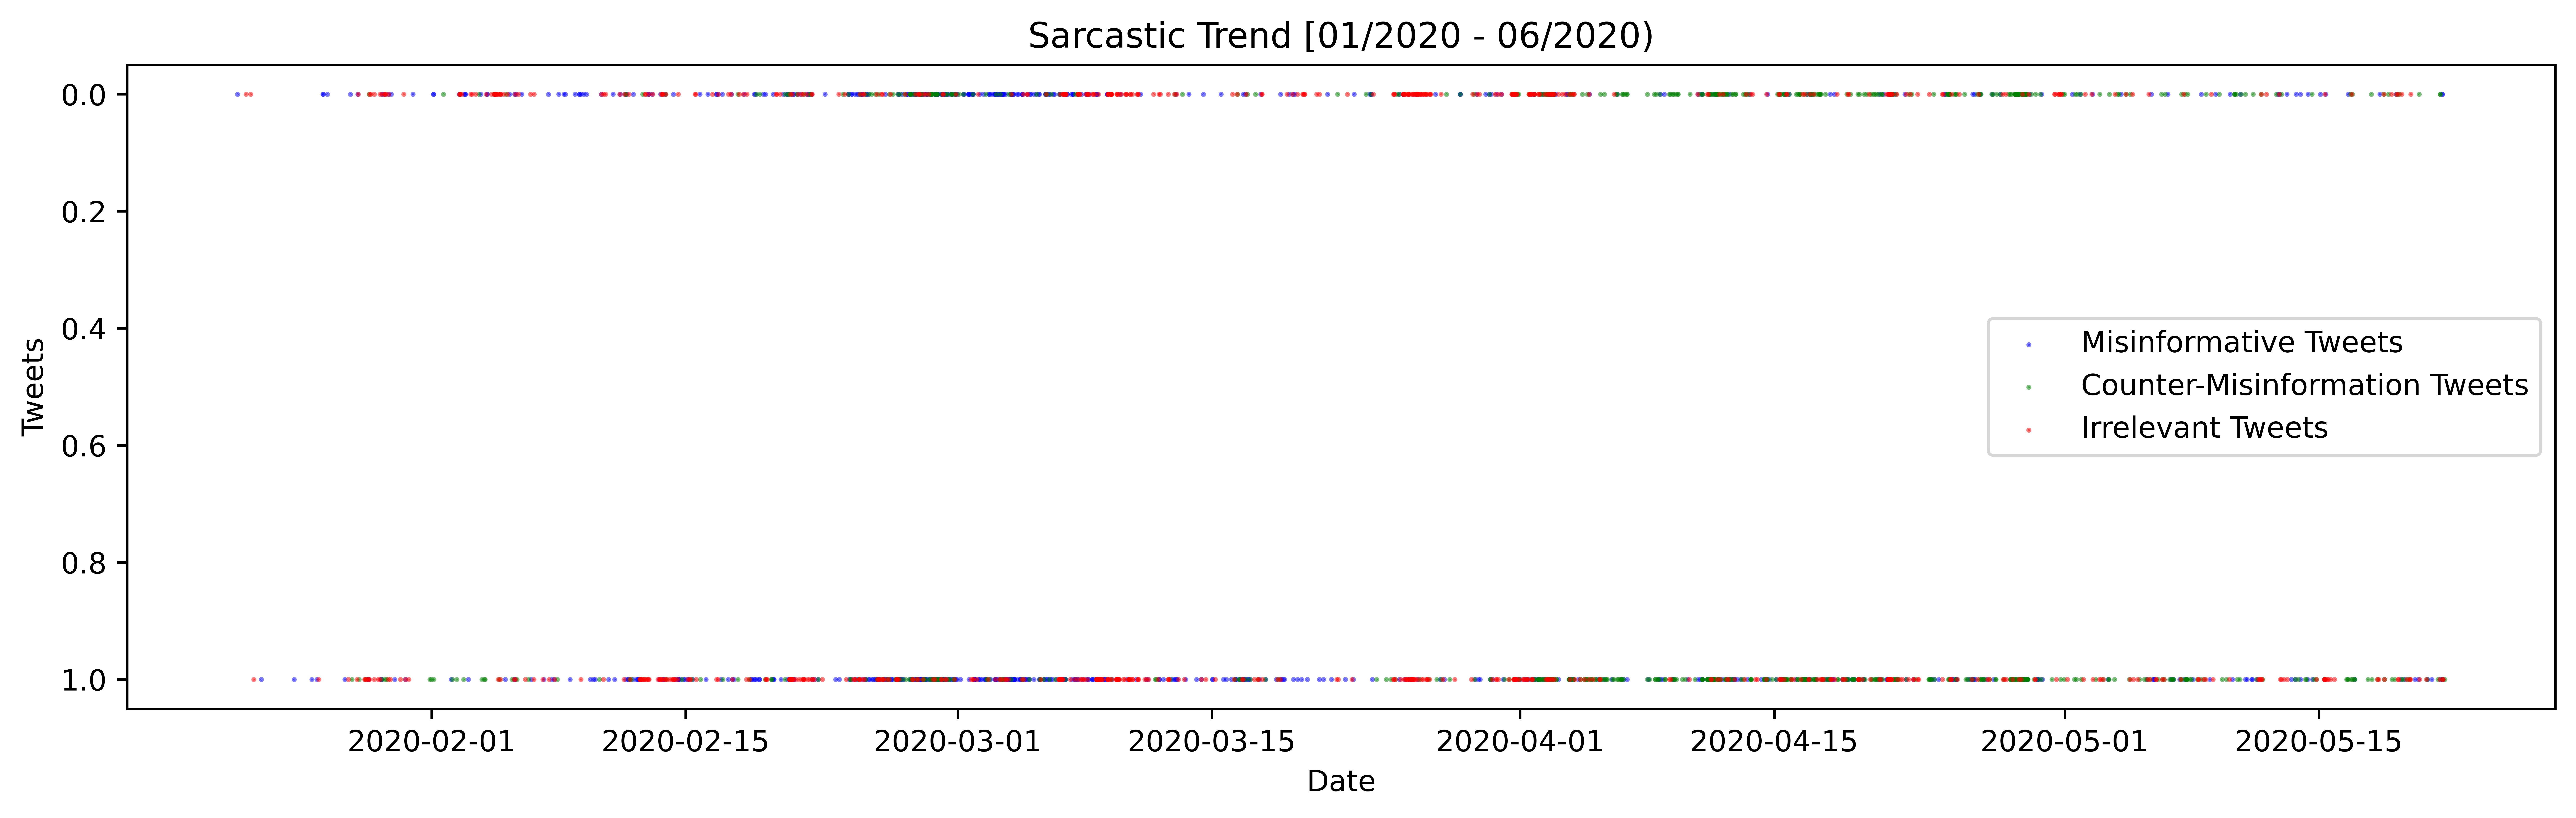

In [206]:
s1 = temp.loc[temp['Sarcasm Label'] == 1].replace({'Sarcasm Label': {1: 'Sarcastic'}})
s0 = temp.loc[temp['Sarcasm Label'] == 0].replace({'Sarcasm Label': {0: 'Not Sarcastic'}})

m0 = temp.loc[temp['Misinformation Label'] == 0]
m1 = temp.loc[temp['Misinformation Label'] == 1]
m2 = temp.loc[temp['Misinformation Label'] == 2]

fig = plt.figure(figsize=(15,4), dpi=1000)
ax1 = fig.add_subplot(111)
ax1.scatter(x=m0.index, y=m0['Sarcasm Label'], c='b', alpha=0.5, label='Misinformative Tweets', s=0.5)
ax1.scatter(x=m1.index, y=m1['Sarcasm Label'], c='g', alpha=0.5, label='Counter-Misinformation Tweets', s=0.5)
ax1.scatter(x=m2.index, y=m2['Sarcasm Label'], c='r', alpha=0.5, label='Irrelevant Tweets', s=0.5)
plt.gca().invert_yaxis()
plt.title('Sarcastic Trend [01/2020 - 06/2020)')
plt.ylabel('Tweets')
plt.xlabel('Date')
plt.legend()
plt.show()

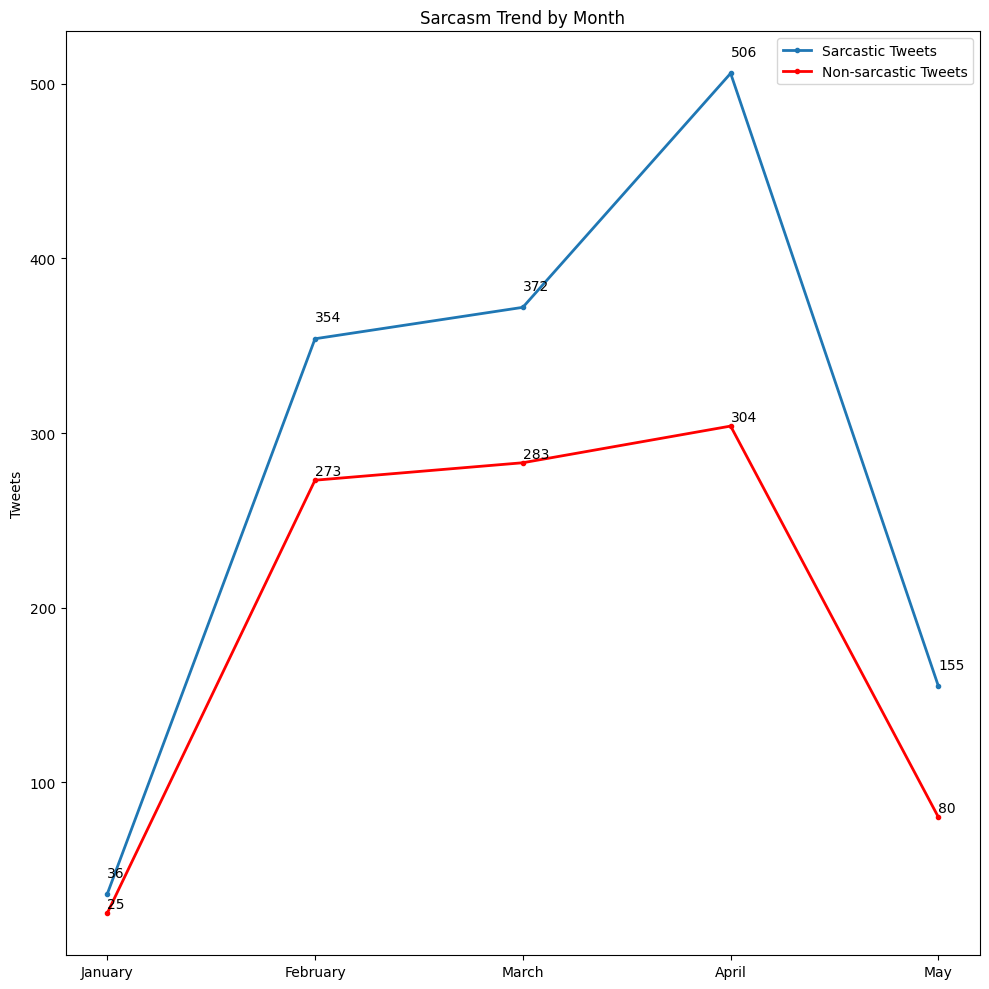

<Figure size 1000x1000 with 0 Axes>

In [392]:
# Bar Chart
january = temp.loc['2020-01']
february = temp.loc['2020-02']
march = temp.loc['2020-03']
april = temp.loc['2020-04']
may = temp.loc['2020-05']

s11 = january['Sarcasm Label'].value_counts()[1]
s12 = february['Sarcasm Label'].value_counts()[1]
s13 = march['Sarcasm Label'].value_counts()[1]
s14 = april['Sarcasm Label'].value_counts()[1]
s15 = may['Sarcasm Label'].value_counts()[1]

s01 = january['Sarcasm Label'].value_counts()[0]
s02 = february['Sarcasm Label'].value_counts()[0]
s03 = march['Sarcasm Label'].value_counts()[0]
s04 = april['Sarcasm Label'].value_counts()[0]
s05 = may['Sarcasm Label'].value_counts()[0]

s1 = [s11, s12, s13, s14, s15]
s0 = [s01, s02, s03, s04, s05]
x = ['January', 'February', 'March', 'April', 'May']

plt.plot(x, s1, marker='.', label='Sarcastic Tweets', linewidth=2)
plt.plot(x, s0, marker='.',c='r', label='Non-sarcastic Tweets', linewidth=2)
for i, j in zip(x, s0):
    plt.annotate(str(j), xy=(i,j+3))
for i, j in zip(x, s1):
    plt.annotate(str(j), xy=(i,j+10))
plt.ylabel('Tweets')
plt.title('Sarcasm Trend by Month')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

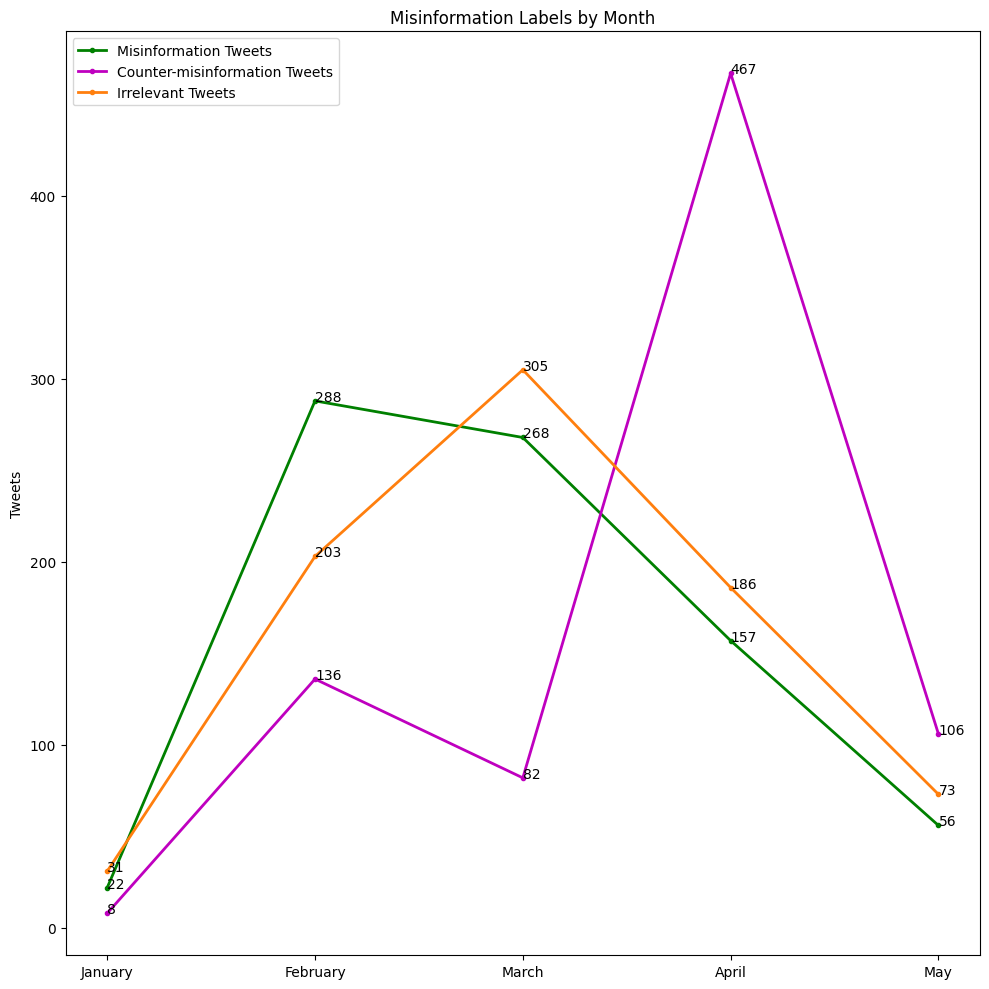

<Figure size 1000x1000 with 0 Axes>

In [390]:
# Bar Chart
january = temp.loc['2020-01']
february = temp.loc['2020-02']
march = temp.loc['2020-03']
april = temp.loc['2020-04']
may = temp.loc['2020-05']

m11 = january['Misinformation Label'].value_counts()[1]
m12 = february['Misinformation Label'].value_counts()[1]
m13 = march['Misinformation Label'].value_counts()[1]
m14 = april['Misinformation Label'].value_counts()[1]
m15 = may['Misinformation Label'].value_counts()[1]

m01 = january['Misinformation Label'].value_counts()[0]
m02 = february['Misinformation Label'].value_counts()[0]
m03 = march['Misinformation Label'].value_counts()[0]
m04 = april['Misinformation Label'].value_counts()[0]
m05 = may['Misinformation Label'].value_counts()[0]

m21 = january['Misinformation Label'].value_counts()[2]
m22 = february['Misinformation Label'].value_counts()[2]
m23 = march['Misinformation Label'].value_counts()[2]
m24 = april['Misinformation Label'].value_counts()[2]
m25 = may['Misinformation Label'].value_counts()[2]

m1 = [m11, m12, m13, m14, m15]
m0 = [m01, m02, m03, m04, m05]
m2 = [m21, m22, m23, m24, m25]
x = ['January', 'February', 'March', 'April', 'May']

plt.plot(x, m0, marker='.', linewidth=2, c='g', label='Misinformation Tweets')
plt.plot(x, m1, marker='.', linewidth=2, c='m', label='Counter-misinformation Tweets')
plt.plot(x, m2, marker='.', linewidth=2, c='tab:orange', label='Irrelevant Tweets')
for i, j in zip(x, m0):
    plt.annotate(str(j), xy=(i,j))
for i, j in zip(x, m1):
    plt.annotate(str(j), xy=(i,j))
for i, j in zip(x, m2):
    plt.annotate(str(j), xy=(i,j))
plt.ylabel('Tweets')
plt.title('Misinformation Labels by Month')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

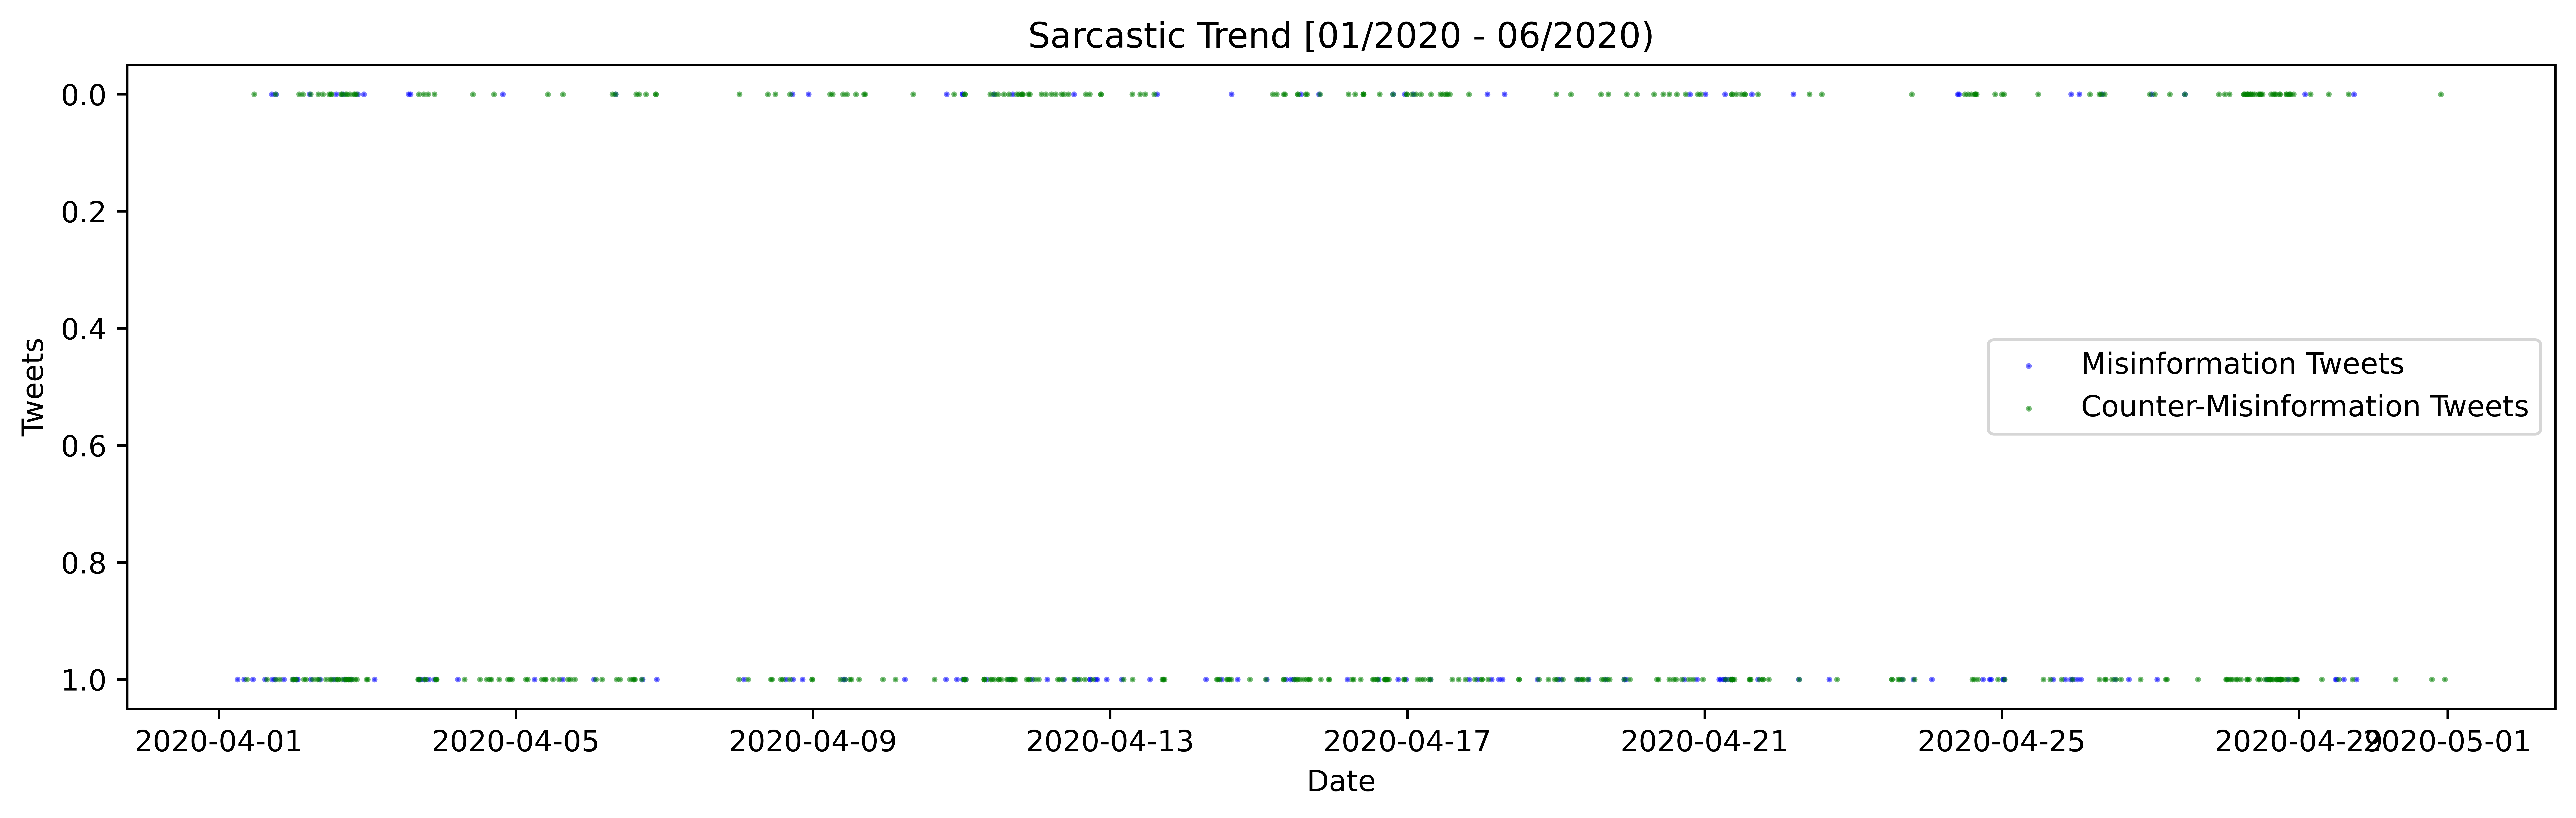

In [237]:
s1 = april.loc[april['Sarcasm Label'] == 1].replace({'Sarcasm Label': {1: 'Sarcastic'}})
s0 = april.loc[april['Sarcasm Label'] == 0].replace({'Sarcasm Label': {0: 'Not Sarcastic'}})

april0 = april.loc[april['Misinformation Label'] == 0]
april1 = april.loc[april['Misinformation Label'] == 1]

fig = plt.figure(figsize=(15,4), dpi=1000)
ax1 = fig.add_subplot(111)
ax1.scatter(x=april0.index, y=april0['Sarcasm Label'], c='b', alpha=0.5, label='Misinformation Tweets', s=1)
ax1.scatter(x=april1.index, y=april1['Sarcasm Label'], c='g', alpha=0.5, label='Counter-Misinformation Tweets', s=1)
plt.gca().invert_yaxis()
plt.title('Sarcastic Trend [01/2020 - 06/2020)')
plt.ylabel('Tweets')
plt.xlabel('Date')
plt.legend()
plt.show()

C:\Users\Eric\AppData\Local\Temp\ipykernel_19656\4080728074.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df.set_index(pd.to_datetime(df['Date'])).replace({'Sarcasm Label': {1: 0, 2: 1}}).replace(r'@\w+','@USER', regex=True).sort_index()
C:\Users\Eric\AppData\Local\Temp\ipykernel_19656\4080728074.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


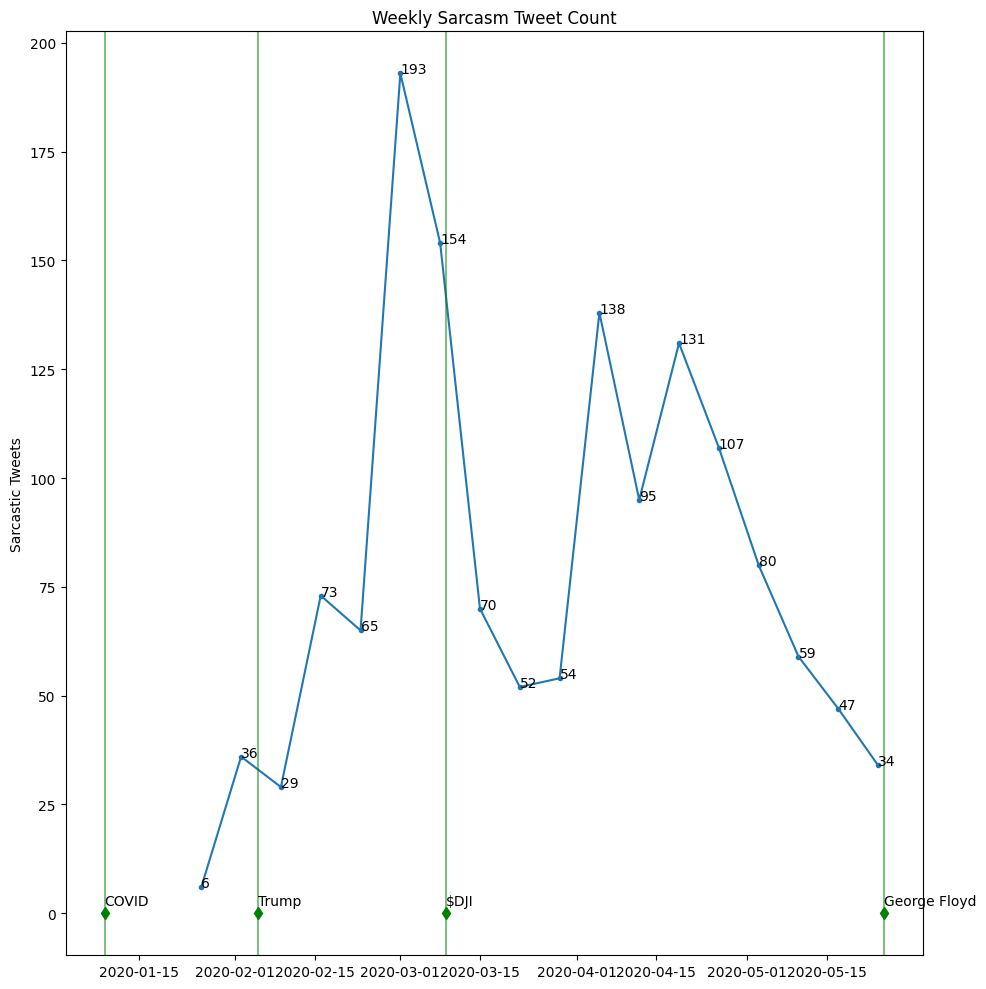

<Figure size 1000x1000 with 0 Axes>

In [343]:
df = pd.read_csv('g5_labeled_Sarcasm.csv')
df = df.rename(columns={'Text': 'Tweet', 'Created At': 'Date', 'Is Retweet': 'Retweet', 'label (0:misinformation, 1: counter-misinformation, 2: irrelevant)': 'Misinformation Label', 'Is_Sarcasm (1: Not_Sarcasm, 2: Sarcasm)': 'Sarcasm Label'})
df = df.set_index(pd.to_datetime(df['Date'])).replace({'Sarcasm Label': {1: 0, 2: 1}}).replace(r'@\w+','@USER', regex=True).sort_index()
df['Date'] = pd.to_datetime(df['Date'])
df['User Location'] = df['User Location'].str.replace(r'[^a-zA-Z]', '').apply(lambda s: ''.join(filter(lambda c: ord(c) < 256, str(s))))
weekly_sarcasm_count = df.groupby([pd.Grouper(key='Date', freq='W')])['Sarcasm Label'].sum()
weekly_sarcasm_count = weekly_sarcasm_count.to_frame(name='Sarcastic Tweet Count')

plt.plot(weekly_sarcasm_count, marker='.', label='Sarcastic Tweets')
for i, j in zip(weekly_sarcasm_count.index, weekly_sarcasm_count['Sarcastic Tweet Count']):
    plt.annotate(str(j), xy=(i,j))
plt.plot(datetime(year=2020, month=1, day=9), 0, 'gd')
plt.axvline(datetime(2020, 1, 9), c='g', alpha=0.5)
plt.annotate('COVID', xy=(datetime(2020, 1, 9), 2))

plt.plot(datetime(year=2020, month=2, day=5), 0, 'gd')
plt.axvline(datetime(2020, 2, 5), c='g', alpha=0.5)
plt.annotate('Trump', xy=(datetime(2020, 2, 5), 2))

plt.plot(datetime(year=2020, month=3, day=9), 0, 'gd')
plt.axvline(datetime(2020, 3, 9), c='g', alpha=0.5)
plt.annotate('$DJI', xy=(datetime(2020, 3, 9), 2))

plt.plot(datetime(year=2020, month=5, day=25), 0, 'gd')
plt.axvline(datetime(2020, 5, 25), c='g', alpha=0.5)
plt.annotate('George Floyd', xy=(datetime(2020, 5, 25), 2))

plt.ylabel('Sarcastic Tweets')
plt.title('Weekly Sarcasm Tweet Count')
plt.tight_layout()
plt.show()
plt.clf()

Date
2020-01-26 00:00:00+00:00           NaN
2020-02-02 00:00:00+00:00     23.666667
2020-02-09 00:00:00+00:00     46.000000
2020-02-16 00:00:00+00:00     55.666667
2020-02-23 00:00:00+00:00    110.333333
2020-03-01 00:00:00+00:00    137.333333
2020-03-08 00:00:00+00:00    139.000000
2020-03-15 00:00:00+00:00     92.000000
2020-03-22 00:00:00+00:00     58.666667
2020-03-29 00:00:00+00:00     81.333333
2020-04-05 00:00:00+00:00     95.666667
2020-04-12 00:00:00+00:00    121.333333
2020-04-19 00:00:00+00:00    111.000000
2020-04-26 00:00:00+00:00    106.000000
2020-05-03 00:00:00+00:00     82.000000
2020-05-10 00:00:00+00:00     62.000000
2020-05-17 00:00:00+00:00     46.666667
2020-05-24 00:00:00+00:00           NaN
Freq: W-SUN, Name: trend, dtype: float64
Date
2020-01-26 00:00:00+00:00    1.031254
2020-02-02 00:00:00+00:00    1.043149
2020-02-09 00:00:00+00:00    0.925597
2020-02-16 00:00:00+00:00    1.031254
2020-02-23 00:00:00+00:00    1.043149
2020-03-01 00:00:00+00:00    0.925597
2

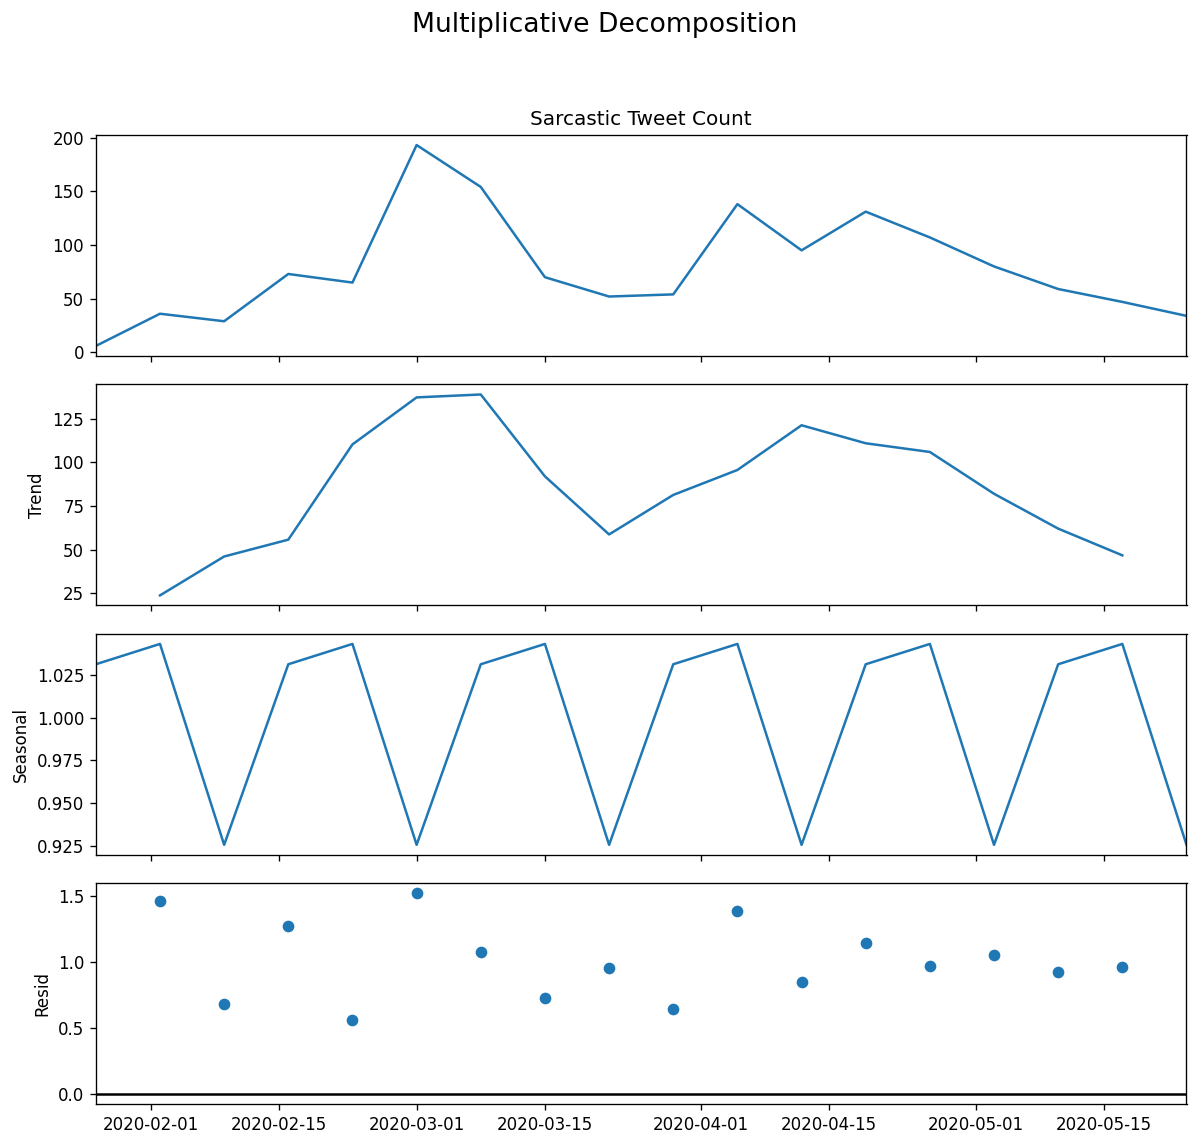

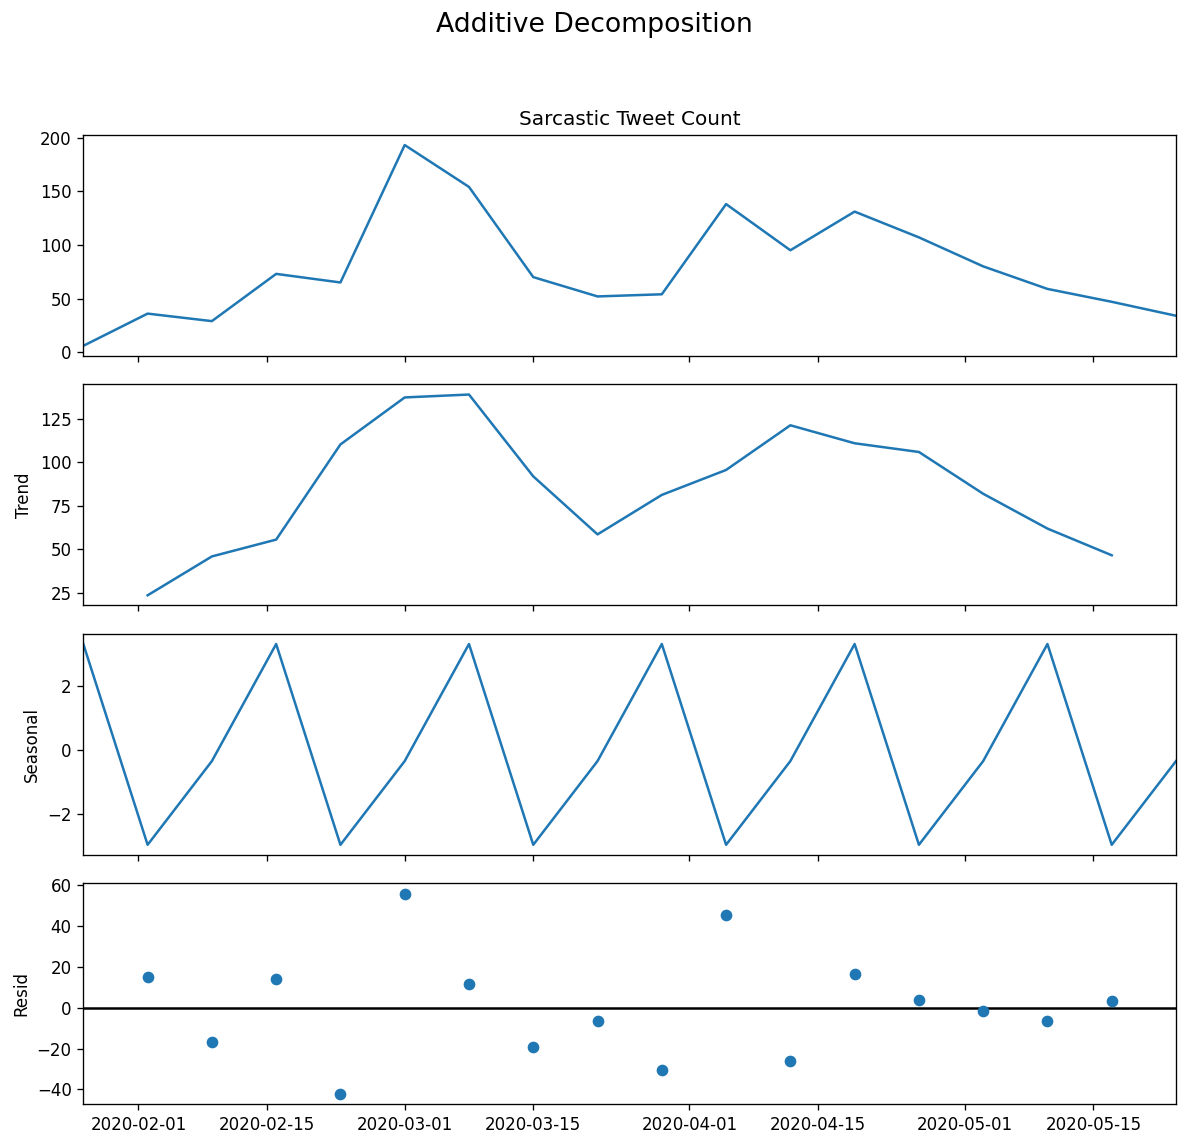

<Figure size 1200x1200 with 0 Axes>

In [278]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parser

md = seasonal_decompose(weekly_sarcasm_count['Sarcastic Tweet Count'], model='multiplicative', period=3)
print(md.trend)
print(md.seasonal)
print(md.resid)
print(md.observed)

ad = seasonal_decompose(weekly_sarcasm_count['Sarcastic Tweet Count'], model='additive', period=3)

plt.rcParams.update({'figure.figsize': (10,10)})
md.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
ad.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()
plt.clf()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


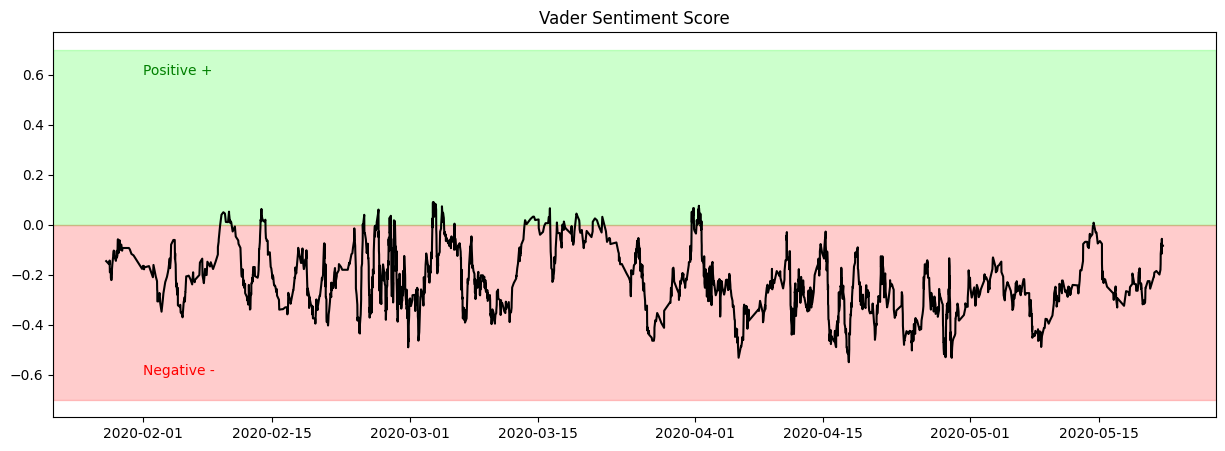

,Tweet,Retweet,Language,User Location,Misinformation Label,Sarcasm Label,vadar compound,vadar sentiment,MA
Date,,,,,,,,,
2020-01-21 07:25:24+00:00,@USER @USER Coronavirus is the government prep...,False,en,Space,0,0,0.2500,positive,NaN
2020-01-21 18:41:18+00:00,@USER THE stock to buy is $AAPL with the coron...,False,en,nan,2,0,0.0000,neutral,NaN
2020-01-22 00:48:28+00:00,5g #WuhanPneumonia #WuhanOutbreak @USER @USER ...,False,en,nan,2,0,0.0000,neutral,NaN
2020-01-22 05:01:27+00:00,Now this makes you think...🤔🤔🤔 . #pardonmyamer...,False,en,"Portland, OR",2,1,0.0000,neutral,NaN
2020-01-22 14:50:46+00:00,They are moving fast now - Coronavirus is clea...,False,en,United Kingdom,0,1,-0.7184,negative,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-21 19:59:10+00:00,5G causes Corona Virus. change my mind @USER,False,en,Buffalo New York,0,0,0.0000,neutral,-0.056190
2020-05-21 20:03:43+00:00,Covid 19 will protect us from 5g,False,en,,0,1,0.3818,positive,-0.068945
2020-05-21 20:07:16+00:00,Covid-19 5G is why I have no gf,False,en,nan,2,1,-0.2960,negative,-0.083745


<Figure size 1000x1000 with 0 Axes>

In [386]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    return sent_i.polarity_scores(text)['compound']

temp['vadar compound'] = temp['Tweet'].apply(vadar_sentiment)

def categorize_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

temp['vadar sentiment'] = temp['vadar compound'].apply(categorize_sentiment)

fig = plt.figure(figsize=(15,5), dpi=100)
plt.plot(temp.index, temp['MA'], c='k')
plt.title('Vader Sentiment Score')
plt.axhspan(ymin=0, ymax=0.7, color='lime', alpha=0.2)
plt.axhspan(ymin=-0.7,ymax=0, color='red', alpha=0.2)
plt.annotate('Negative -', xy=(datetime(2020,2,1), -0.6), color='red')
plt.annotate('Positive +', xy=(datetime(2020,2,1), 0.6), color='green')
plt.show()
plt.tight_layout()
plt.clf()

# temp['MA'] = temp['vadar compound'].rolling(window=14).mean()
# temp['normalized_vader compound'] = (temp['vadar compound']-temp['vadar compound'].min())/(temp['vadar compound'].max()-temp['vadar compound'].min())
# temp['normalized_vader compound'] = temp['normalized_vader compound'].rolling(window=24).mean()
# temp = temp.drop(columns=['MA', 'normalized_vader compound'], axis=1)
# temp['MA'] = temp['vadar compound'].rolling(20).mean()
temp